## Dependencies and starter code

In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "mouse_metadata.csv"
study_results = "study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_research = pd.merge(mouse_metadata, study_results)
mouse_research.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [235]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = mouse_research.groupby("Drug Regimen")
summary_mean = summary_df["Tumor Volume (mm3)"].mean()
summary_median = summary_df["Tumor Volume (mm3)"].median()
summary_variance = summary_df["Tumor Volume (mm3)"].var()
summary_std = summary_df["Tumor Volume (mm3)"].std()
summary_sem = summary_df["Tumor Volume (mm3)"].sem()
merge_table_1 = pd.merge(summary_mean, summary_median, on="Drug Regimen")
merge_table_2 = pd.merge(merge_table_1, summary_variance, on="Drug Regimen")
merge_table_2 = merge_table_2.rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y": "Median Tumor Volume", "Tumor Volume (mm3)": "Tumor Volume Variance"})
merge_table_3 = pd.merge(merge_table_2, summary_std, on="Drug Regimen")
merge_table_4 = pd.merge(merge_table_3, summary_sem, on="Drug Regimen")
summary_stats = merge_table_4.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume Std. Dev.", "Tumor Volume (mm3)_y": "Tumor Volume Std. Err."})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

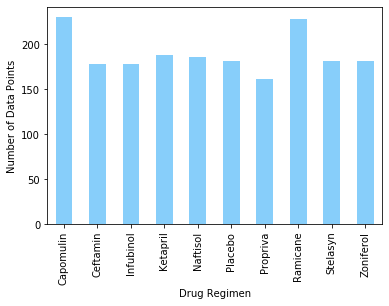

In [236]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count = summary_df.count()
drug_count = drug_count["Mouse ID"]
drug_count.plot(kind="bar", color="lightskyblue")
plt.ylabel("Number of Data Points")

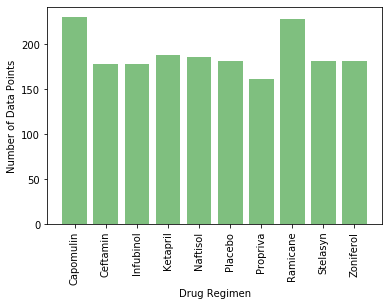

In [243]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(drug_count))
y_axis = drug_count
plt.bar(x_axis, y_axis, color="green", alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
bar_labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.xticks(x_axis, bar_labels, rotation='vertical')
plt.show()

## Pie plots

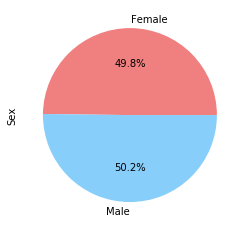

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique = mouse_research[["Mouse ID", "Sex"]]
unique = unique.sort_values("Mouse ID")
unique = unique.drop_duplicates(keep="first")
gender_group = unique.groupby("Sex")
gender_count = gender_group["Sex"].count()
colors = ["lightcoral", "lightskyblue"]
gender_chart = gender_count.plot(kind="pie", colors=colors, autopct="%1.1f%%")
gender_chart

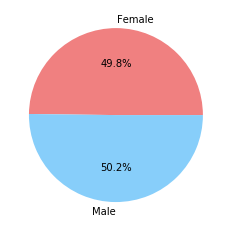

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]
plt_gender = plt.pie(gender_count, colors=colors, labels=labels, autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
capomulin_last = mouse_research.loc[[19,   29,   39,   64,  104,  124,  134,  144,  164,  204,  224,
             244,  282,  299,  309,  317,  337,  340,  350,  360,  370,  380,
             390,  440, 1455]]

ramicane_last = mouse_research.loc[[9,  49,  59,  74,  84,  94, 114, 154, 174, 184, 194, 214, 234,
            254, 262, 272, 289, 327, 400, 410, 420, 430, 447, 449, 453]]

infubinol_last = mouse_research.loc[[463,  473,  530,  540,  637,  669,  742,  800,  834,  949, 1053,
            1076, 1205, 1225, 1312, 1314, 1397, 1485, 1616, 1632, 1640, 1683,
            1726, 1813, 1872]]

ceftamin_last = mouse_research.loc[[493,  594,  600,  617,  840,  940,  993, 1033, 1112, 1119, 1122,
            1132, 1162, 1260, 1379, 1406, 1551, 1582, 1583, 1670, 1743, 1773,
            1797, 1845, 1855]]

In [131]:
#Capomulin Outliers
capomulin_quartiles = capomulin_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ca_lowerq = capomulin_quartiles[0.25]
ca_upperq = capomulin_quartiles[0.75]
ca_iqr = ca_upperq-ca_lowerq
ca_lower_bound = ca_lowerq - (1.5*ca_iqr)
ca_upper_bound = ca_upperq + (1.5*ca_iqr)
print(f"Values below {ca_lower_bound} could be outliers.")
print(f"Values above {ca_upper_bound} could be outliers.")
capomulin_outliers = capomulin_last.loc[(capomulin_last["Tumor Volume (mm3)"] < ca_lower_bound) | (capomulin_last["Tumor Volume (mm3)"] > ca_upper_bound)]
print(capomulin_outliers)

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [132]:
#Ramicane Outliers
ramicane_quartiles = ramicane_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
r_lowerq = ramicane_quartiles[0.25]
r_upperq = ramicane_quartiles[0.75]
r_iqr = r_upperq-r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")
ramicane_outliers = ramicane_last.loc[(ramicane_last["Tumor Volume (mm3)"] < r_lower_bound) | (ramicane_last["Tumor Volume (mm3)"] > r_upper_bound)]
print(ramicane_outliers)

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [136]:
#Infubinol Outliers
infubinol_quartiles = infubinol_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
i_lowerq = infubinol_quartiles[0.25]
i_upperq = infubinol_quartiles[0.75]
i_iqr = i_upperq-i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Values below {i_lower_bound} could be outliers.")
print(f"Values above {i_upper_bound} could be outliers.")
infubinol_outliers = infubinol_last.loc[(infubinol_last["Tumor Volume (mm3)"] < i_lower_bound) | (infubinol_last["Tumor Volume (mm3)"] > i_upper_bound)]
print(infubinol_outliers)

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0  


In [134]:
#Ceftamin Outliers
ceftamin_quartiles = ceftamin_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ce_lowerq = ceftamin_quartiles[0.25]
ce_upperq = ceftamin_quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq
ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
print(f"Values below {ce_lower_bound} could be outliers.")
print(f"Values above {ce_upper_bound} could be outliers.")
ceftamin_outliers = ceftamin_last.loc[(ceftamin_last["Tumor Volume (mm3)"] < ce_lower_bound) | (ceftamin_last["Tumor Volume (mm3)"] > ce_upper_bound)]
print(ceftamin_outliers)

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


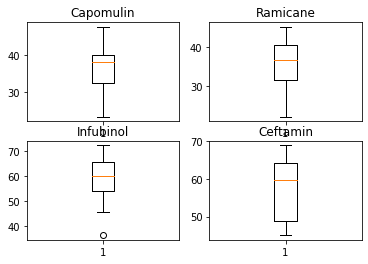

In [158]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots(2,2)
axs[0, 0].boxplot(capomulin_last["Tumor Volume (mm3)"])
axs[0, 0].set_title("Capomulin")
axs[0, 1].boxplot(ramicane_last["Tumor Volume (mm3)"])
axs[0, 1].set_title("Ramicane")
axs[1, 0].boxplot(infubinol_last["Tumor Volume (mm3)"])
axs[1, 0].set_title("Infubinol")
axs[1, 1].boxplot(ceftamin_last["Tumor Volume (mm3)"])
axs[1, 1].set_title("Ceftamin")
plt.show()

## Line and scatter plots

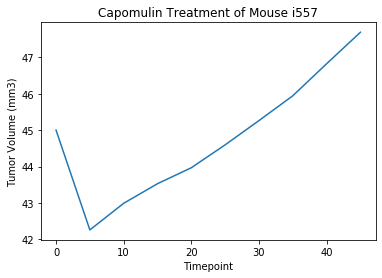

In [169]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treatment = mouse_research.loc[mouse_research["Drug Regimen"] == "Capomulin" ,:]
capomulin_time = capomulin_treatment.loc[capomulin_treatment["Mouse ID"] == "i557" ,:]
capomulin_x_axis = capomulin_time["Timepoint"]
capomulin_y_axis = capomulin_time["Tumor Volume (mm3)"]
plt.plot(capomulin_x_axis, capomulin_y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse i557")
plt.show()

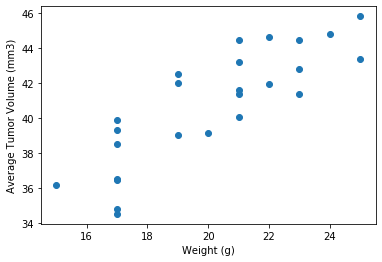

In [202]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_unique = capomulin_treatment["Mouse ID"].drop_duplicates(keep="first")
capomulin_unique.index
capomulin_unique = mouse_research.loc[[10,   20,   30,   60,   95,  115,  125,  135,  155,  195,  215,
             235,  273,  290,  300,  310,  328,  338,  341,  351,  361,  371,
             381,  431, 1452]]
capomulin_weight = capomulin_unique["Weight (g)"]

mouse_id = capomulin_unique["Mouse ID"]

tumor_list = []

for id in mouse_id:
    mouse = mouse_research.loc[mouse_research["Mouse ID"] == id ,:]
    tumor_average = mouse["Tumor Volume (mm3)"].mean()
    tumor_list.append(tumor_average)
    
plt.scatter(capomulin_weight, tumor_list)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


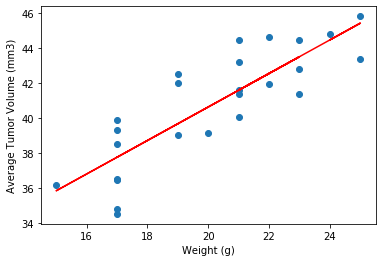

In [208]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_weight, tumor_list)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight, tumor_list)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_weight, tumor_list)
plt.plot(capomulin_weight, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()